In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tqdm.autonotebook import tqdm
df = pd.read_csv('R_cleaned_data.csv')

In [2]:
def target_encode(age,gender):
    if age<=40 and gender=='Male':
        return 'Young men'
    elif age>40 and gender=='Male':
        return 'Old men'
    elif age<=40 and gender=='Female':
        return 'Young women'
    else:
        return 'Old women'

In [3]:
def get_cleaned_DrugData(DrugName):
    df_clean = df[['Age','Gender',DrugName,'Description1','Description2']].dropna()
    df_clean = pd.get_dummies(df_clean, columns=['Description1','Description2'])
    
    df_clean['Age_normalized'] = df_clean['Age'].apply(lambda x: sum(map(int,(x.split('-'))))/2)
    df_clean['Target'] = df_clean.apply(lambda x: target_encode(x.Age_normalized,x.Gender),axis=1)
    df_clean.drop(['Age','Gender'],inplace=True,axis=1)
    
    X = df_clean.drop('Target',axis=1)
    y = df_clean['Target']
#     X_scaler = StandardScaler()
#     X = X_scaler.fit_transform(X)
#     X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

    return X,y

In [4]:
X,y = get_cleaned_DrugData('AMITRIPTYLINE')

# Kmeans

In [5]:
from sklearn.cluster import KMeans

In [6]:
ssd = [] # An empty list for sum of squared distances to be appended for k values 2 to 30

for k in tqdm(range(2,15)):
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

  0%|          | 0/13 [00:00<?, ?it/s]

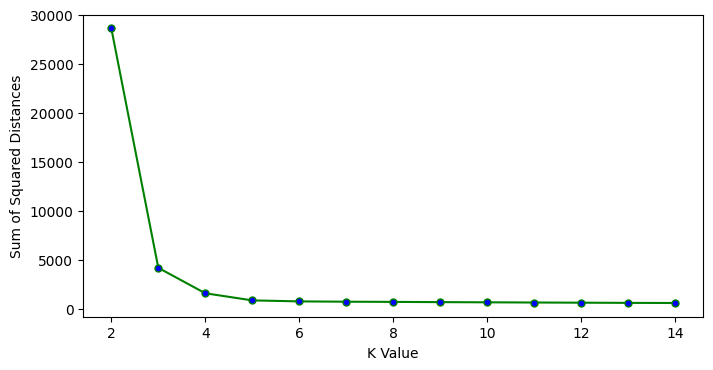

In [7]:
plt.figure(figsize=(8,4),dpi=100)
plt.plot(range(2,15), ssd, marker='o', color='green', markerfacecolor='blue', markersize=5);
plt.xlabel("K Value");
plt.ylabel("Sum of Squared Distances");

- k = 4 is the optimal here

In [8]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [9]:
k_means_labels = model.fit_predict(X)
k_means_labels

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

# DBSCAN

In [10]:
from sklearn.cluster import DBSCAN

In [11]:
X.shape

(559, 83)

In DBSCAN, there are 2 main parameters that can be adjusted, 'epsilon' (eps) and 'min_samples'.
A good 'min_samples' number is two times the number of features (columns). We have 83 features so 'min_samples' value will be 83*2 = 166

In [12]:
all_outlier_percent = []
metrics = ['euclidean','manhattan']
for metric in tqdm(metrics):
    outlier_percent = []
    for eps in np.linspace(0.001,3,50): # check 50 values of epsilon between 0.001 and 3

        # Create Model
        dbscan = DBSCAN(eps=eps,min_samples=8,metric=metric)
        dbscan.fit(X)

        # Percentage of points that are outliers
        perc_outliers = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
        outlier_percent.append(perc_outliers)
    all_outlier_percent.append(outlier_percent)

  0%|          | 0/2 [00:00<?, ?it/s]

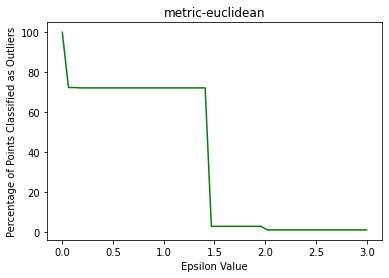

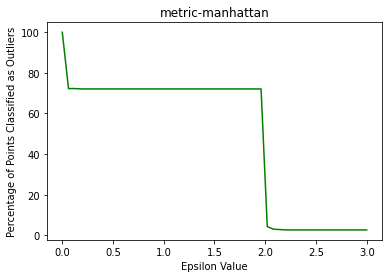

In [13]:
for i, outlier in enumerate(all_outlier_percent):
    plt.figure(i)
    sns.lineplot(x=np.linspace(0.001,3,50),y=outlier, color='green')
    plt.title(f'metric-{metrics[i]}')
    plt.ylabel("Percentage of Points Classified as Outliers")
    plt.xlabel("Epsilon Value")
    plt.show

The 'elbow' forms somewhere around epsilon = 1.5 for cosine metric
Let's create a model wil epsilon value 1.5 and minimum number of samples 166

In [14]:
dbscan = DBSCAN(eps=1.5,min_samples=166,metric='euclidean')
dbscan.fit(X)

DBSCAN(eps=1.5, min_samples=166)

In [15]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0

DBSCAN, with the set parameters does not perform well for this dataset. It divides the points into 2 classes

In [16]:
set(dbscan.labels_)

{-1, 0}

# Hierarchical Clustering

In [17]:
from sklearn.cluster import AgglomerativeClustering

In [18]:
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster import hierarchy

7
7
7


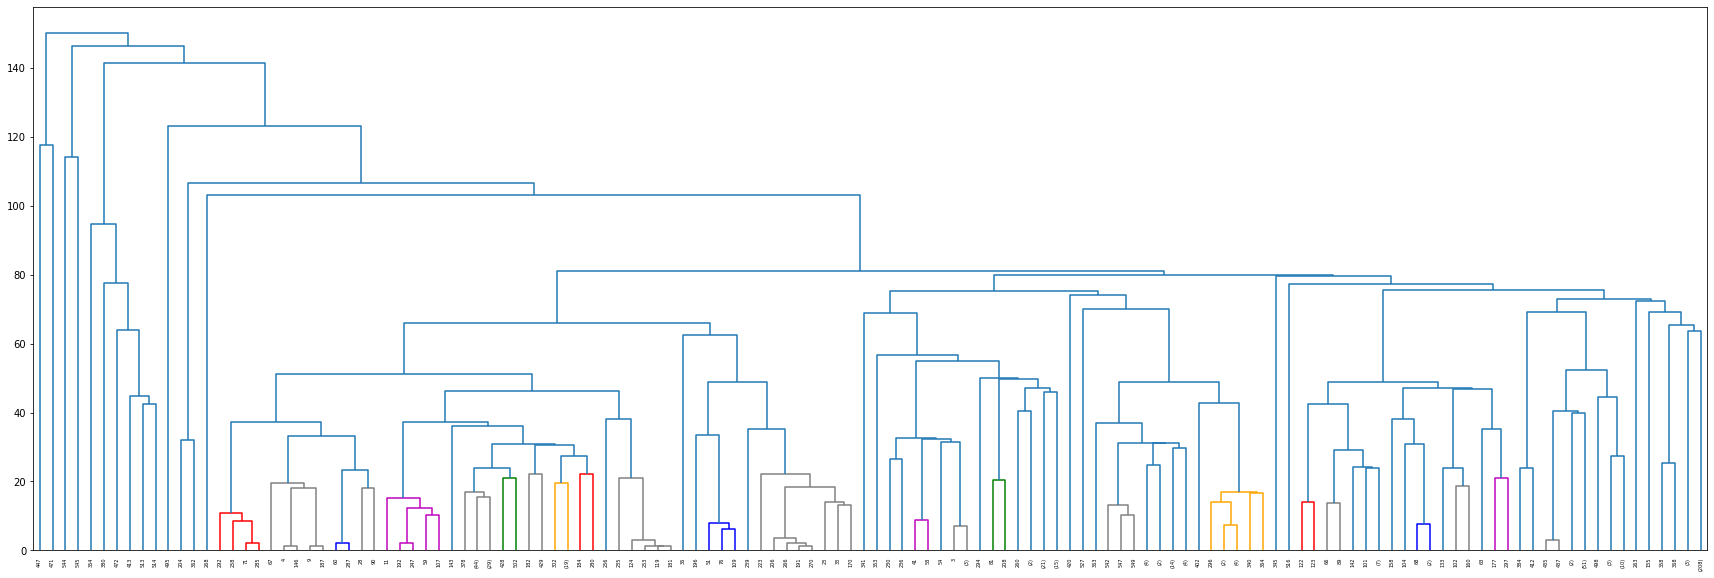

In [ ]:
aff = [ "euclidean","manhattan", "cosine"]
for af in aff:
    model = AgglomerativeClustering(n_clusters=None,linkage='single',distance_threshold=0,affinity=af) 
    cluster_labels = model.fit_predict(X)
    linkage_matrix = hierarchy.linkage(model.children_)
    plt.figure(figsize=(30,10))
    hierarchy.set_link_color_palette(['r','grey', 'b', 'grey', 'm', 'grey', 'g', 'grey', 'orange'])
    dn = hierarchy.dendrogram(linkage_matrix,truncate_mode='level',p=15, color_threshold=23)
    print(len(set(dn['color_list'])))

- Here all are giving 7 clusters, we can choose anyone.

# Result Comparision

- we found that kmeans is the best for this medicine as its giving 4 cluster. The original data also had 4 classes
- dbscan only 2 cluster
- and Hierarchical Clustering is giving 7 cluster

- Kmeans is easy to build and also its the best performing here, we can check its performance by passing different value of k and based on elbow method we can choose best k 